[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

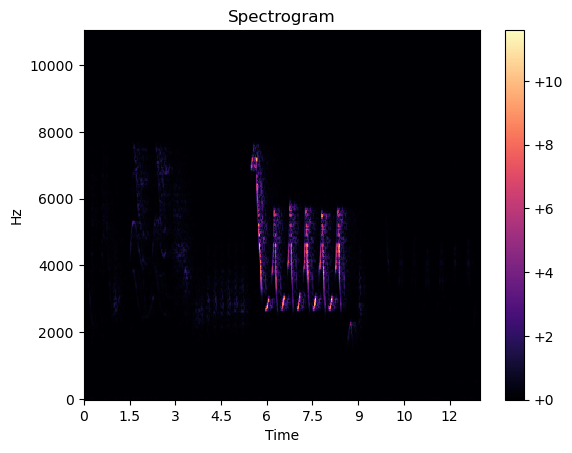

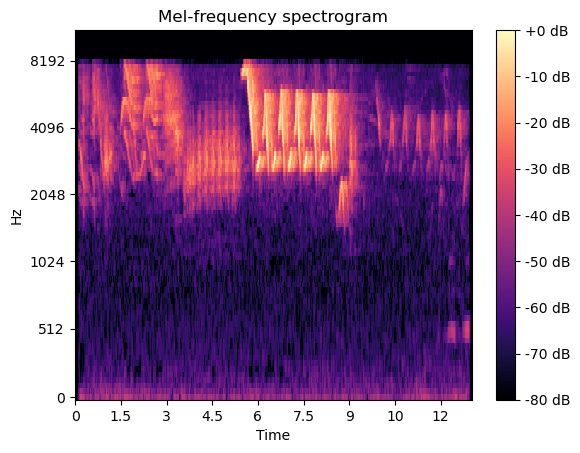

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.feature

# file loading
y, sr = librosa.load("audio_16k/bird-sing.wav")

WINDOW_SIZE = 512

# STFT
Y = librosa.stft(y=y, n_fft=WINDOW_SIZE) # coeff_per_freq, n_windows
fig, ax = plt.subplots()
img = librosa.display.specshow(np.abs(Y), x_axis='time', y_axis='linear', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f')
ax.set(title='Spectrogram')

# Mel
S_mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=WINDOW_SIZE, hop_length=WINDOW_SIZE//4, n_mels=80)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S_mel, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [ ]:
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.fft import fft

    def sine_by_freq(t, freq):
        return np.sin(t * freq * 2*np.pi)

    def DFT(x):
        """Compute the discrete Fourier Transform of the 1D array x"""
        x = np.asarray(x, dtype=float)
        N = x.shape[0]
        n = np.arange(N)
        k = n.reshape((N, 1))
        M = np.exp(-2j * np.pi * k * n / N)
        return np.dot(M, x)

    # t = 3
    N_SECS = 3

    sr = 16000

    fs = 1 / float(sr)
    t = np.linspace(0, N_SECS, N_SECS * sr)

    FREQ1 = 500
    sin1 = sine_by_freq(t, FREQ1)

    FREQ2 = 4000
    sin2 = sine_by_freq(t, FREQ2)

    N_SAMPLES_TO_PLOT = 200
    t_start = t[:N_SAMPLES_TO_PLOT]
    plt.plot(t_start, sin1[:N_SAMPLES_TO_PLOT], label="500 Hz", alpha=0.7)
    plt.plot(t_start, sin2[:N_SAMPLES_TO_PLOT], label="4K Hz", alpha=0.7)
    plt.plot(t_start, sin1[:N_SAMPLES_TO_PLOT] + sin2[:N_SAMPLES_TO_PLOT], label="sum", alpha=0.7)
    plt.xlabel("time (seconds)")
    plt.legend(loc="best")


    # DFT - TODO
    
    # dft1 = DFT(sin1)
    # plt.figure()
    # plt.plot(np.arange(0, N_SECS * fs) / 10., abs(dft1))


    plt.show()      

In [ ]:
# Place your code for this part here

In [ ]:
# Place your code for this part here